In [1]:
import os
import textwrap
from io import BytesIO
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from cairosvg import svg2png
from PIL import Image

scope = Path().resolve()
print(scope)

os.chdir("..")

scope = Path().resolve()
print(scope)

/mnt/c/Users/ankit/Desktop/Portfolio/kaggle/drawing-wit-llms/dataset
/mnt/c/Users/ankit/Desktop/Portfolio/kaggle/drawing-wit-llms


In [2]:
df_0 = pd.read_csv("dataset/kaggle_outputs/gemma2-9b-it_4bit_run.csv")
df_1 = pd.read_csv("dataset/kaggle_outputs/gemma2-9b-it_4bit_run-1.csv")
df_2 = pd.read_csv("dataset/kaggle_outputs/gemma2-9b-it_4bit_run-2.csv")
df_3 = pd.read_csv("dataset/kaggle_outputs/gemma2-9b-it_4bit_run-3.csv")
df_4 = pd.read_csv("dataset/kaggle_outputs/gemma2-9b-it_4bit_run-4.csv")
df_5 = pd.read_csv("dataset/kaggle_outputs/gemma2-9b-it_4bit_run-5.csv")

In [3]:
def svg2pil(svg):
    try:
        res = Image.open(BytesIO(svg2png(svg)))
    except Exception:
        default_svg = """<svg width="256" height="256" viewBox="0 0 256 256"><circle cx="50" cy="50" r="40" fill="red" /></svg>"""
        res = Image.open(BytesIO(svg2png(default_svg)))
    return res

Visualize pre-processed svg generated by gemma2-9b over 6 different runs

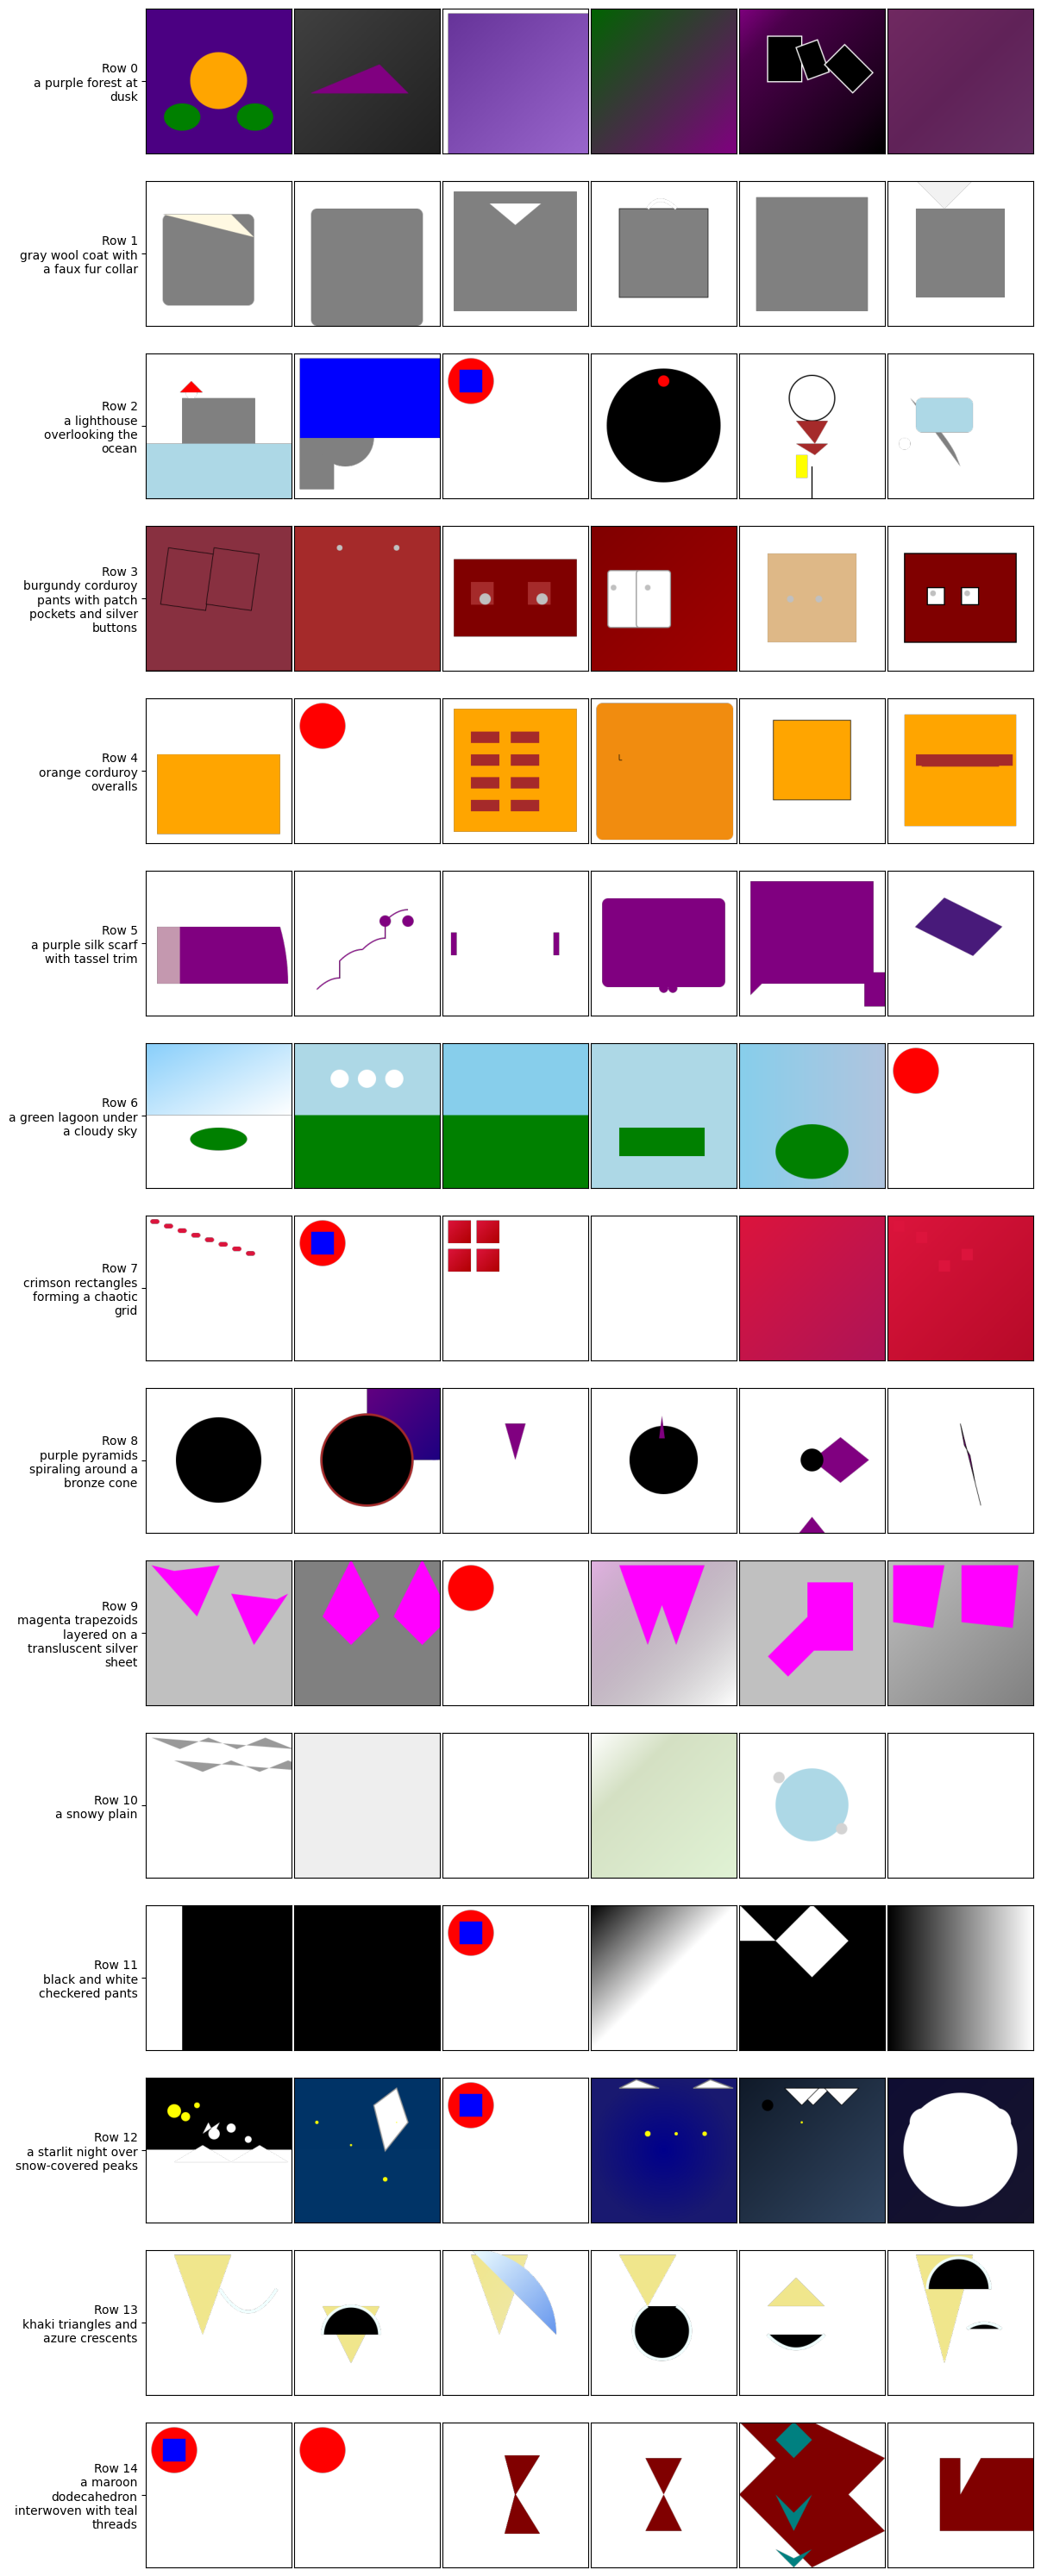

In [ ]:
rows = 15
cols = 6
image_height = 256
image_width = 256


fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))


for r in range(15):
    for c, df in enumerate([df_0, df_1, df_2, df_3, df_4, df_5]):
        ax = axes[r, c]
        image_index = r * cols + c

        data = df.iloc[r]["svg"]
        ax.imshow(svg2pil(data))

        ax.set_xticks([])
        ax.set_yticks([])

        if c == 0:
            tick_pos = (image_height - 1) / 2
            ax.set_yticks([tick_pos])
            description = df.iloc[r]["description"]
            label = textwrap.fill(description, width=20)
            ax.set_yticklabels([f"Row {r}\n" + label ], fontsize=10)


plt.tight_layout(pad=0.5, h_pad=1.0, w_pad=0.5)
plt.show()

Visualize post-processed svg generated by gemma2-9b over 6 different runs

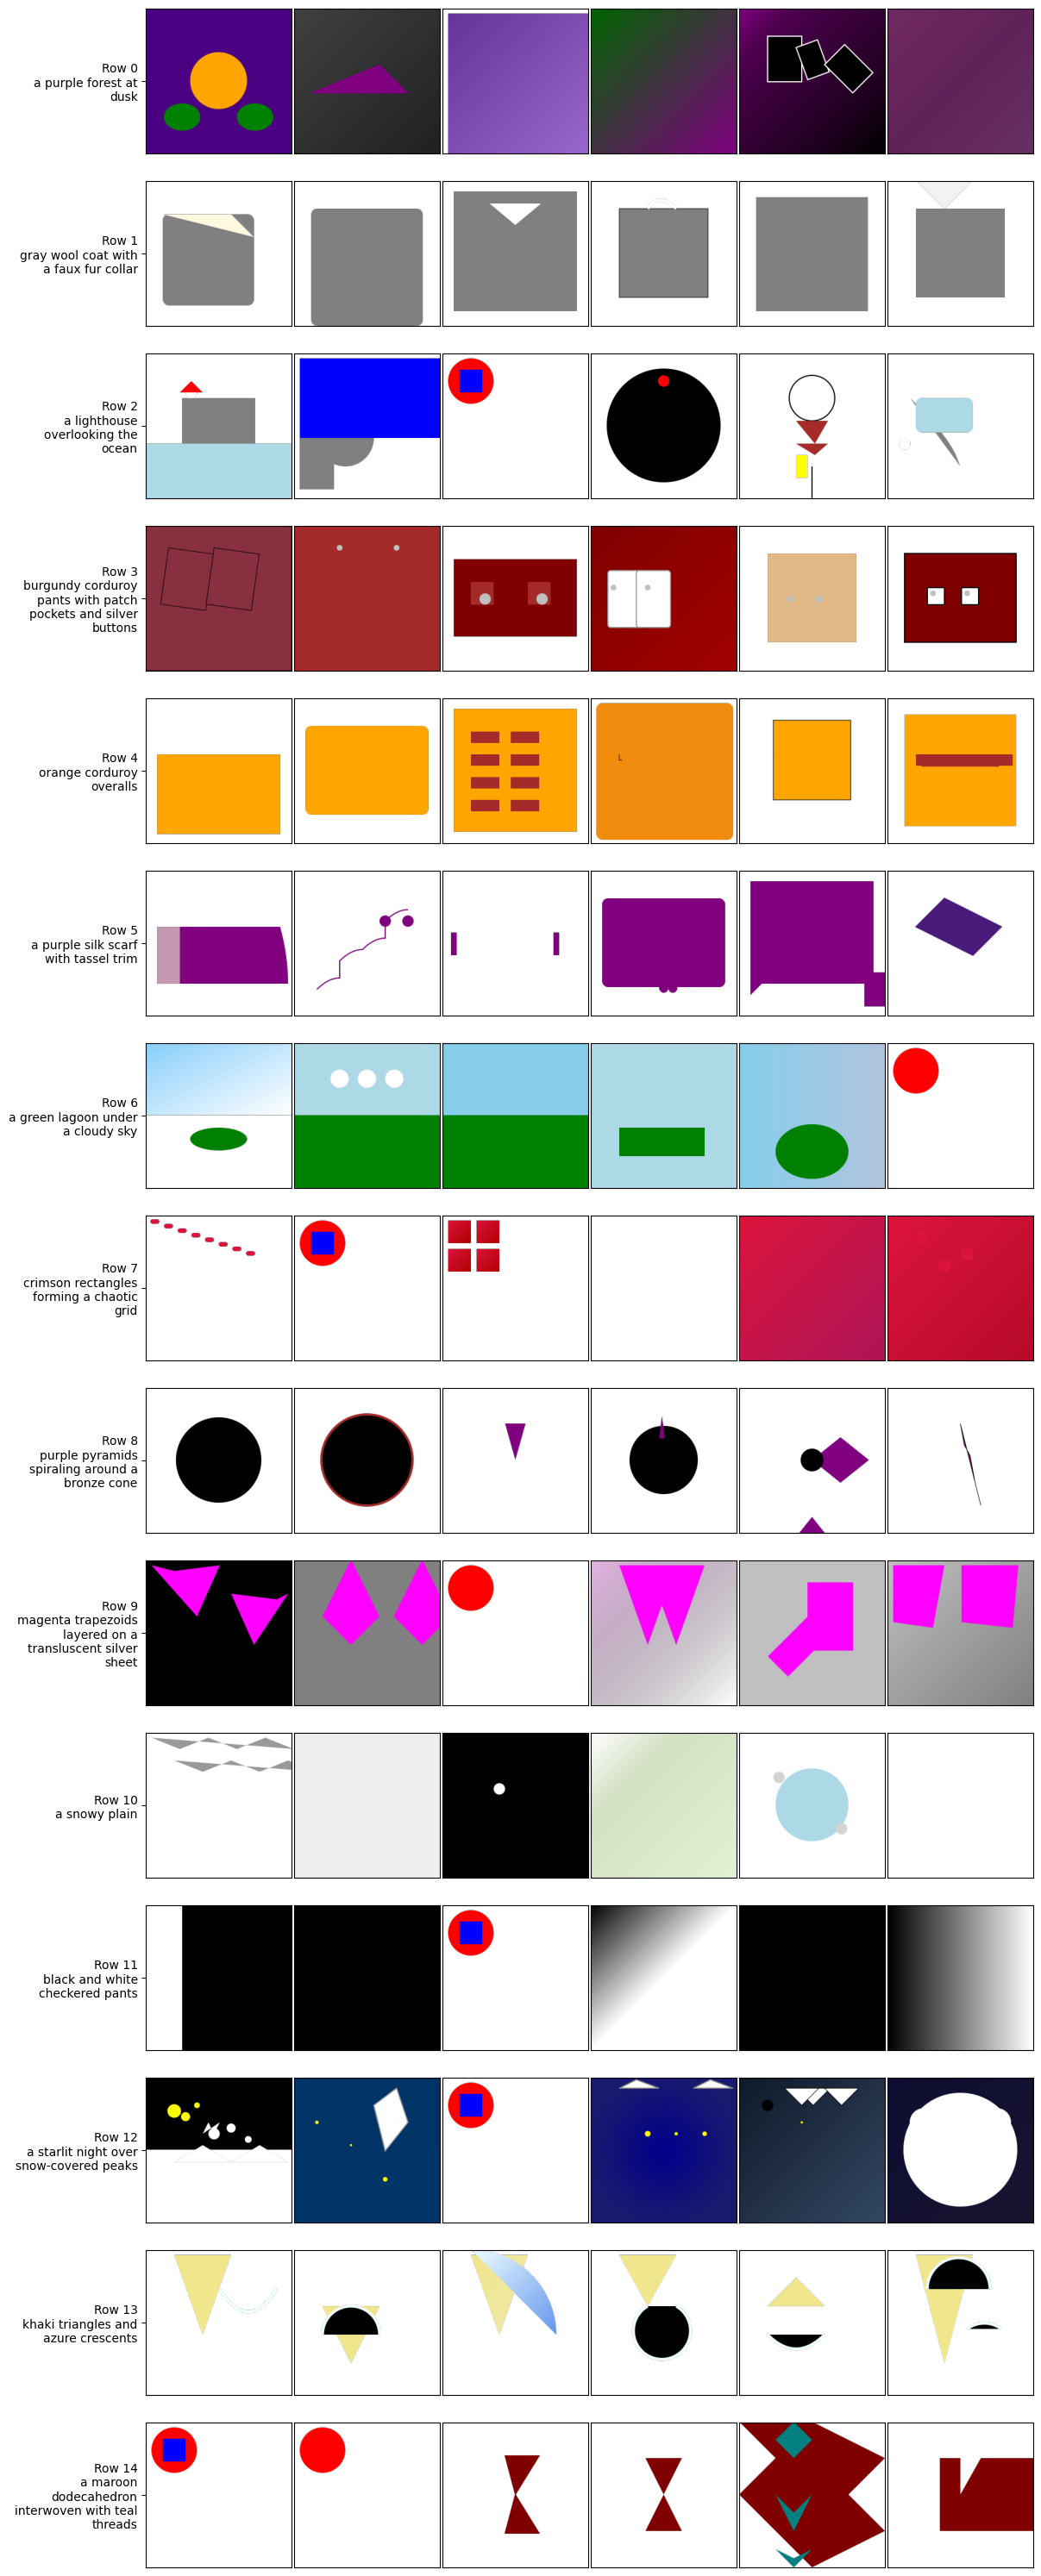

In [ ]:
rows = 15
cols = 6
image_height = 256
image_width = 256


fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))


for r in range(15):
    for c, df in enumerate([df_0, df_1, df_2, df_3, df_4, df_5]):
        ax = axes[r, c]
        image_index = r * cols + c

        data = df.iloc[r]["processed_svg"]
        ax.imshow(svg2pil(data))

        ax.set_xticks([])
        ax.set_yticks([])

        if c == 0:
            tick_pos = (image_height - 1) / 2
            ax.set_yticks([tick_pos])
            description = df.iloc[r]["description"]
            label = textwrap.fill(description, width=20)
            ax.set_yticklabels([f"Row {r}\n" + label ], fontsize=10)


plt.tight_layout(pad=0.5, h_pad=1.0, w_pad=0.5)
plt.show()

Find differences between the two

In [ ]:
for r in range(15):
    for c, df in enumerate([df_0, df_1, df_2, df_3, df_4, df_5]):

        if svg2pil(df.iloc[r]['svg']) != svg2pil(df.iloc[r]['processed_svg']):
            print(f"Dataframe index {c} in row {r}")

Dataframe index 1 in row 4
Dataframe index 1 in row 8
Dataframe index 0 in row 9
Dataframe index 2 in row 10
Dataframe index 4 in row 11


the defaullt svg from the starter notebook

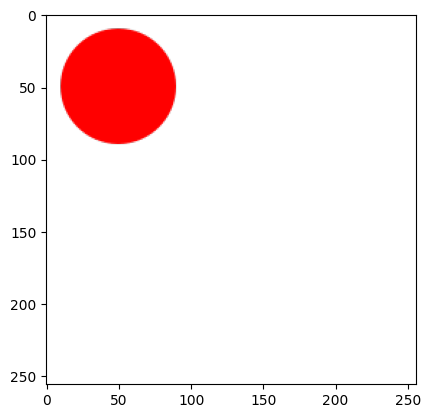

In [5]:
plt.imshow(svg2pil("hi"));